In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [7]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

path='./Dataset/Numbers'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)

In [14]:
myList=os.listdir(path)

numOfClasses=len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
    myPicList=os.listdir(path+"/"+str(x))
    for y in myPicList:
        try:
            curImg=cv2.imread(path+"/"+str(x)+"/"+y)
            curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
            images.append(curImg)
            classNo.append(x)
        except:
            pass
    print(x)

images=np.array(images)
classNo=np.array(classNo)

Importing Classes..........
0
1
2
3
4
5
6
7
8
9


In [15]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

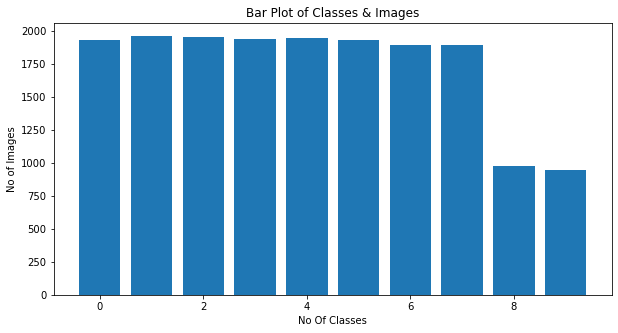

In [16]:
numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [17]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [18]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)

In [19]:
def myModel():
	noOfFilters=60
	sizeOfFilter1=(5,5)
	sizeOfFilter2=(3,3)
	sizeOfPool=(2,2)
	noOfNode=50

	model=Sequential()
	model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
	model.add((Conv2D(noOfFilters, sizeOfFilter1,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))

	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(noOfNode, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(numOfClasses, activation='softmax'))
	model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
	return model

model=myModel()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

In [20]:
history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
	steps_per_epoch=len(x_train)//50,
	epochs=15,
	validation_data=(x_validation,y_validation),
	shuffle=1)

model.save("BanglaModel.h5")

Epoch 1/15
347/347 [==============================] - 116s 330ms/step - loss: 1.6054 - accuracy: 0.4411 - val_loss: 0.6472 - val_accuracy: 0.7778
Epoch 2/15
347/347 [==============================] - 125s 359ms/step - loss: 0.9287 - accuracy: 0.6870 - val_loss: 0.4782 - val_accuracy: 0.8315
Epoch 3/15
347/347 [==============================] - 112s 322ms/step - loss: 0.7867 - accuracy: 0.7352 - val_loss: 0.4179 - val_accuracy: 0.8449
Epoch 4/15
347/347 [==============================] - 113s 326ms/step - loss: 0.6854 - accuracy: 0.7679 - val_loss: 0.3589 - val_accuracy: 0.8751
Epoch 5/15
347/347 [==============================] - 111s 321ms/step - loss: 0.6276 - accuracy: 0.7908 - val_loss: 0.3249 - val_accuracy: 0.8887
Epoch 6/15
347/347 [==============================] - 111s 321ms/step - loss: 0.5855 - accuracy: 0.8041 - val_loss: 0.2889 - val_accuracy: 0.8974
Epoch 7/15
347/347 [==============================] - 116s 334ms/step - loss: 0.5483 - accuracy: 0.8165 - val_loss: 0.2614 -

In [21]:
_, acc = model.evaluate(x_validation, steps=len(x_validation), verbose=0)

In [22]:
print('Accuracy of test> %.3f' % (acc * 100.0))

Accuracy of test> 0.000


In [24]:
y_pred = model.predict(x_test)

In [25]:
import numpy as np
y_pred_t = np.argmax(y_pred, axis = 1)
y_pred_t

array([0, 3, 2, ..., 8, 5, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(x_test.labels, y_pred_t)

AttributeError: 'numpy.ndarray' object has no attribute 'labels'

In [33]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(x_test.labels, y_pred_t)

AttributeError: 'numpy.ndarray' object has no attribute 'labels'